# Version 2023/11/17(now using)

# import

In [90]:
import math
import os
import sys
import random
import pandas as pd
import openpyxl 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 36, 20
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from arch.unitroot import ADF
import itertools
import warnings
warnings.filterwarnings("ignore")

# Data Import And Preprocessing(Cleaning)

## Date Import 

In [57]:
# print (os.path.abspath('./'))
file_path='loans_head.csv'
#定义空值 便于数据清洗
missing_values=['0','0.0','0.00','n/a','na']
data1 = pd.read_csv(file_path,na_values=missing_values)
# print('\n')
print(data1.info())
print(data1.head(5))
# data1.iloc[:,1056]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Columns: 1057 entries, observation_date to 1055
dtypes: float64(1056), object(1)
memory usage: 396.5+ KB
None
  observation_date        0         1        2         3        4         5   
0       2018-07-01   982.97  58505.02  3070.36   4592.62  2224.89       NaN  \
1       2018-08-01  1666.17  58505.02  2820.75   5914.47      NaN       NaN   
2       2018-09-01  1687.53  58505.02  2820.75  16080.82      NaN       NaN   
3       2018-10-01  1687.53  60017.18  2840.62  57914.94      NaN  57914.94   
4       2018-11-01   678.20  84276.35  2840.62  57914.94      NaN  57914.94   

          6         7          8  ...  1046  1047  1048  1049  1050  1051   
0   8540.45  18950.23  202457.22  ...   NaN   NaN   NaN   NaN   NaN   NaN  \
1  23890.52  18950.23  202457.22  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2  10901.71   5443.82  202457.22  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3  10901.71   9407.93  219351.46  ...

## Date Preprocess

In [58]:
# 仅保留存在四十八（可更改）个以上非空值的列
df=data1.dropna(axis=1,thresh=48)
#str类型转为date类型
df.loc[:,"observation_date"] = [datetime.strptime(i,'%Y-%m-%d') for i in df.loc[:,"observation_date"]]
# format date 类型 为%Y-%m
df.loc[:,"observation_date"] = [datetime.strftime(i,'%Y-%m') for i in df.loc[:,"observation_date"]]  
df.info()
df.head(5)#print 可展示处理后结果 
# 取均值作为数据分析样本


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Columns: 650 entries, observation_date to 1000
dtypes: float64(649), object(1)
memory usage: 243.9+ KB


,observation_date,0,1,2,3,7,8,10,11,12,...,988,989,990,991,992,993,995,996,997,1000
0,2018-07,982.97,58505.02,3070.36,4592.62,18950.23,202457.22,13526.97,123618.61,13225.88,...,1529.53,33340.51,2176.88,2333.36,6952.88,15883.88,3006.96,2172.49,7502.69,96269.05
1,2018-08,1666.17,58505.02,2820.75,5914.47,18950.23,202457.22,13526.97,123618.61,33027.98,...,822.45,33340.51,18553.84,2333.36,6952.88,15883.88,3006.96,6110.00,3270.93,96269.05
2,2018-09,1687.53,58505.02,2820.75,16080.82,5443.82,202457.22,4667.62,58764.84,33027.98,...,472.36,12911.97,18553.84,2333.36,27565.32,15883.88,3006.96,6110.00,3270.93,111323.25
3,2018-10,1687.53,60017.18,2840.62,57914.94,9407.93,219351.46,4667.62,58764.84,39294.41,...,591.76,12830.39,18553.84,2779.75,27565.32,15883.88,3006.96,6110.00,3270.93,122514.56
4,2018-11,678.20,84276.35,2840.62,57914.94,9407.93,219351.46,4667.62,58764.84,39294.41,...,475.32,33953.16,18553.84,2779.75,27565.32,68110.19,4306.54,6110.00,3270.93,36396.73


## sum or average

In [59]:
average=df.iloc[:,1:649].mean(axis=1)
average

0      35229.013966
1      40759.939923
2      44187.515864
3      43183.130463
4      45156.002052
5      44110.347037
6      48764.585324
7      52807.558210
8      51577.470864
9      51732.389815
10     56431.726605
11     47603.645154
12     50628.204954
13     55788.174769
14     61954.116019
15     57376.194414
16     56952.190880
17     60364.104907
18     63418.737994
19     58067.207423
20     54140.585756
21     54915.938935
22     55275.053503
23     60358.595710
24     65685.738056
25     67097.920556
26     70549.555262
27     74302.278611
28     81572.041173
29     88521.743534
30    100020.545910
31    111122.039769
32    123319.715293
33    119559.833596
34    120796.422978
35    116382.645000
36    120592.462562
37    135550.287917
38    139630.827762
39    167706.101312
40    156337.759506
41    169111.416636
42    163684.525231
43    152827.739954
44    156030.831451
45    140189.490648
46    129497.836590
47    119817.472747
dtype: float64

# SARIMA

## Pics about data
分别绘制第一列和第二列随日期的变化以及两列在同一坐标系下的情况  
数据数量级差异过大，且账户数量过多，是否应该考虑将所有数据求和或取平均等办法处理？  
是以，此处暂将求和处理后的数据作为原序列数据

### average data

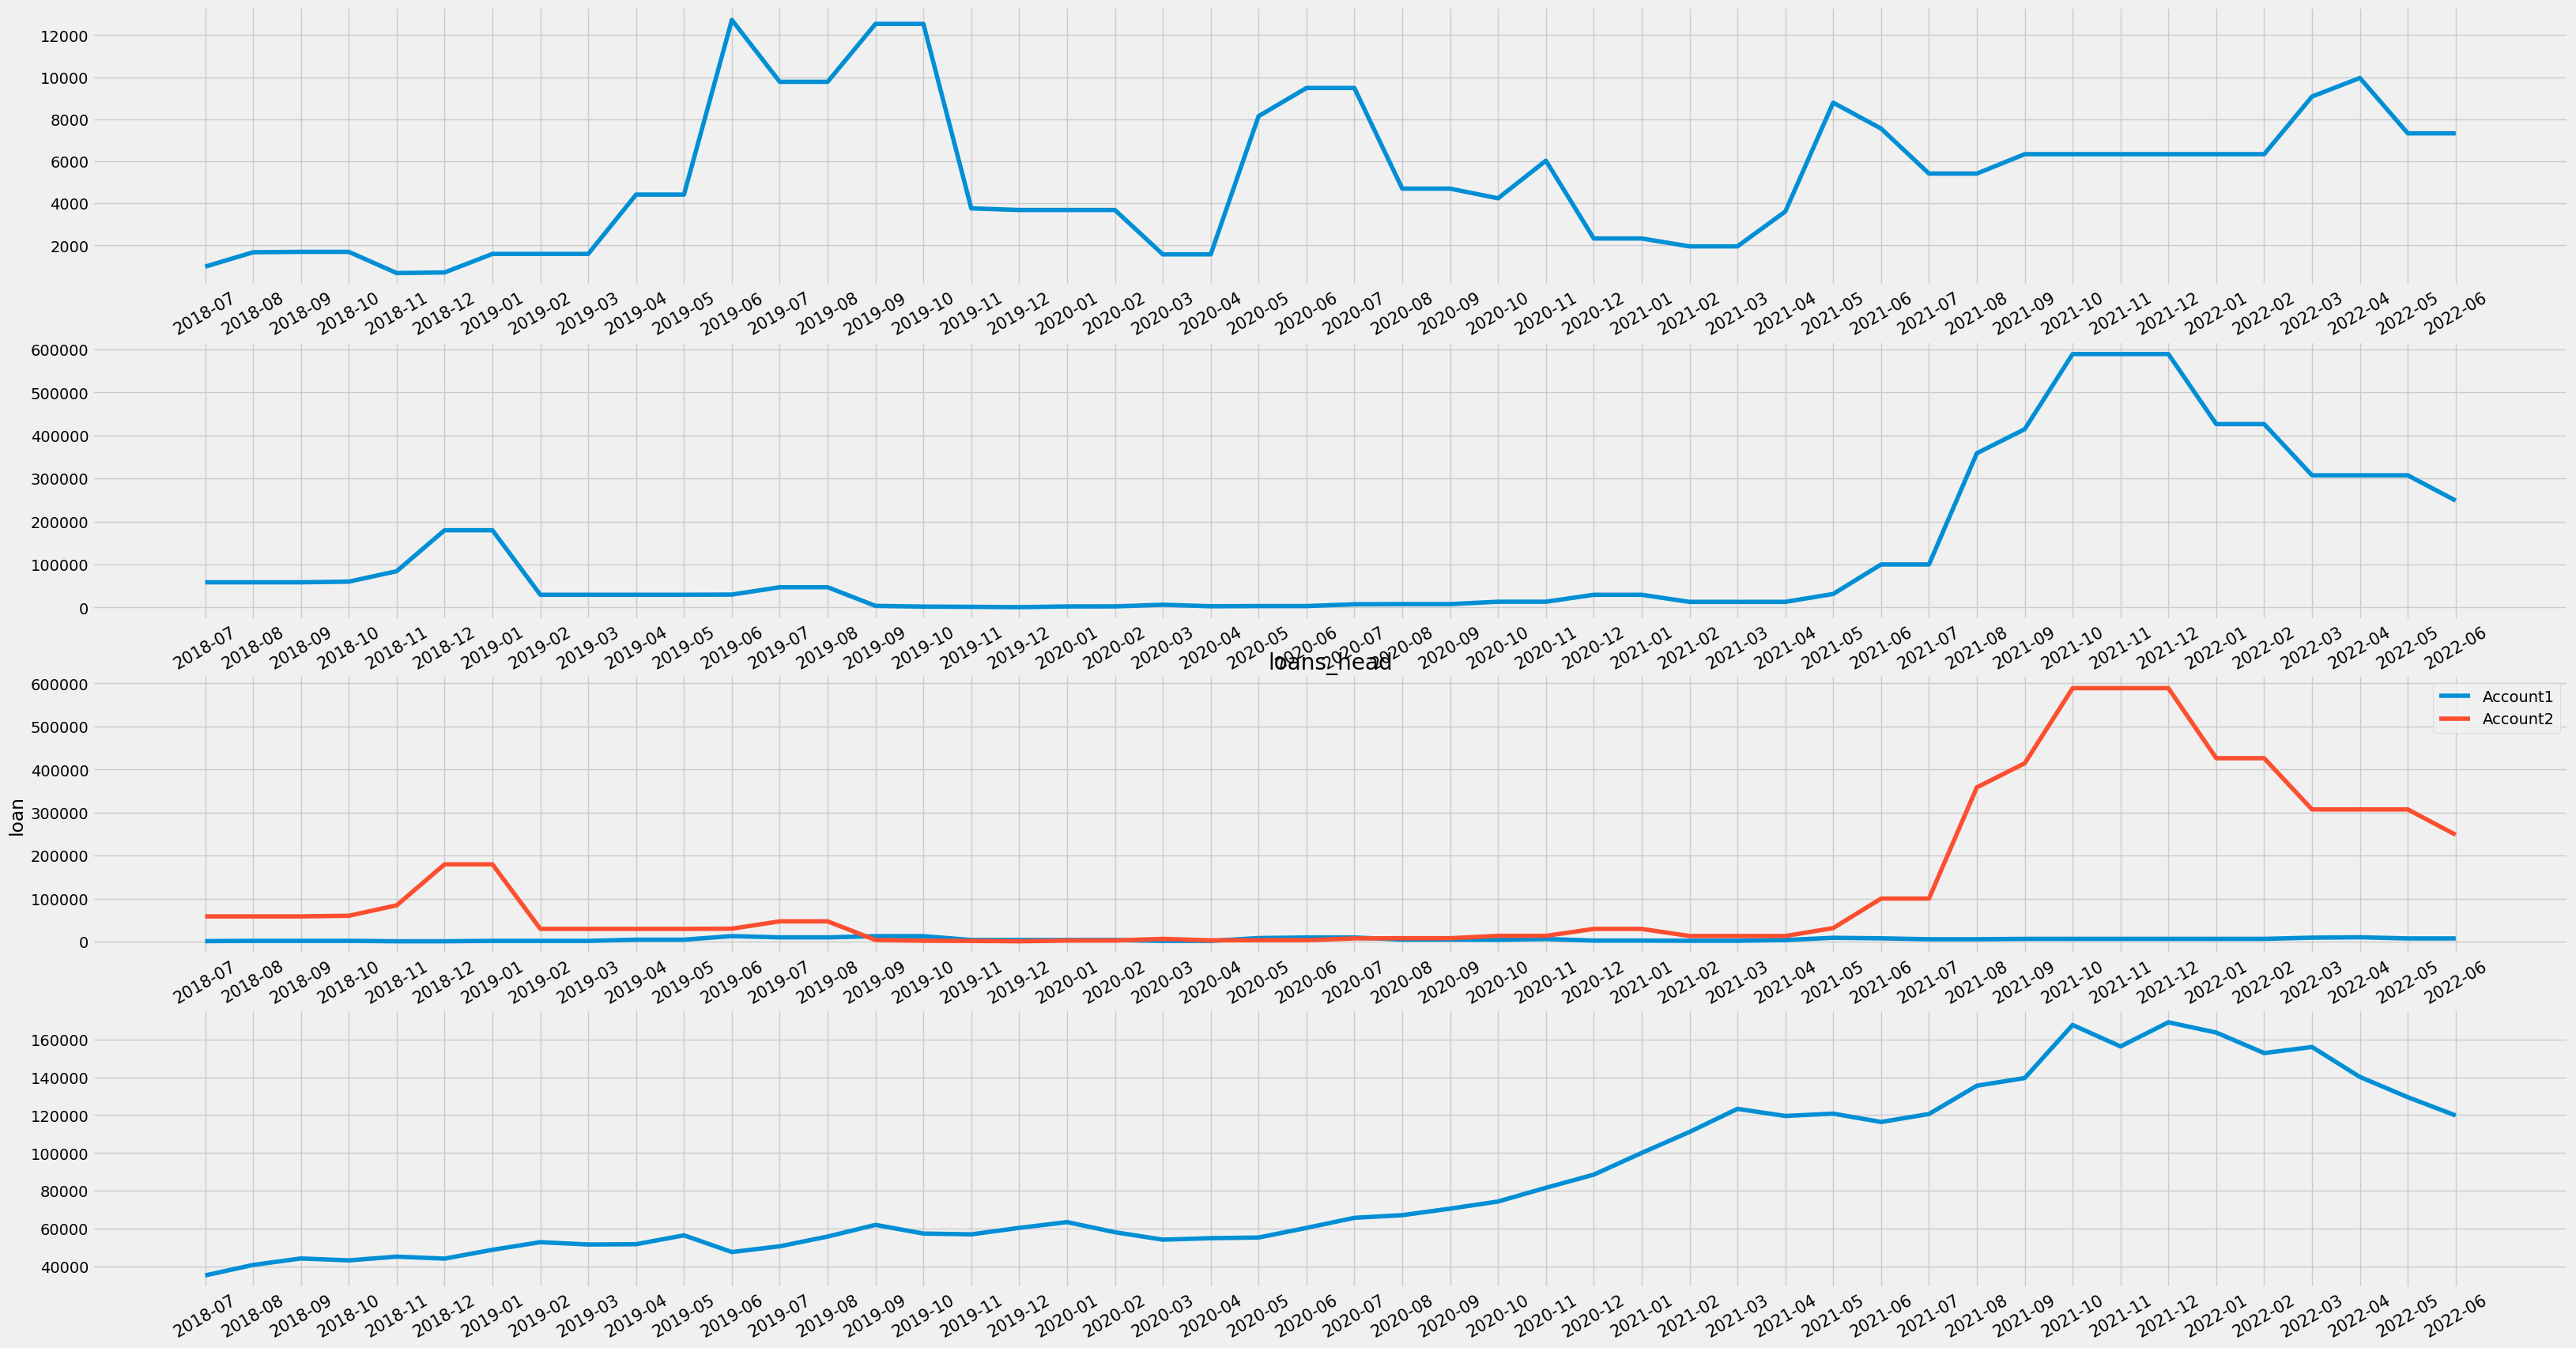

In [60]:

date=df.observation_date
# 分别绘制第一列和第二列随日期的变化以及两列在同一坐标系下的情况
# 数据数量级差异过大，且账户数量过多，是否应该考虑将所有数据求和或取平均等办法处理？
Account1=df.iloc[:,1]
Account2=df.iloc[:,2]
fig,ax=plt.subplots(4,1)
for i in range(0,4):
    ax[i].tick_params(axis='x', labelsize=15)
    ax[i].tick_params(axis='x', labelrotation= 30) 
ax[0].plot(date,Account1,label='Account1')
ax[1].plot(date,Account2,label='Account2')
ax[2].plot(date,Account1,label='Account1')
ax[2].plot(date,Account2,label='Account2')
ax[2].set_xlabel('observation_date')
ax[2].set_ylabel('loan')
ax[2].set_title('loans_head')
ax[2].legend()
# 求和处理 # 可作为原序列图
ax[3].plot(date,average,label='average')

### ADF and PACF
自相关系数、自相关图和偏自相关图

[1.         0.97974278] 自相关系数
[1.         0.97974278 0.9537732  0.90903929 0.84993479 0.79270666
 0.71994678 0.65028766 0.57931023 0.4986609  0.42502818] 自相关系数


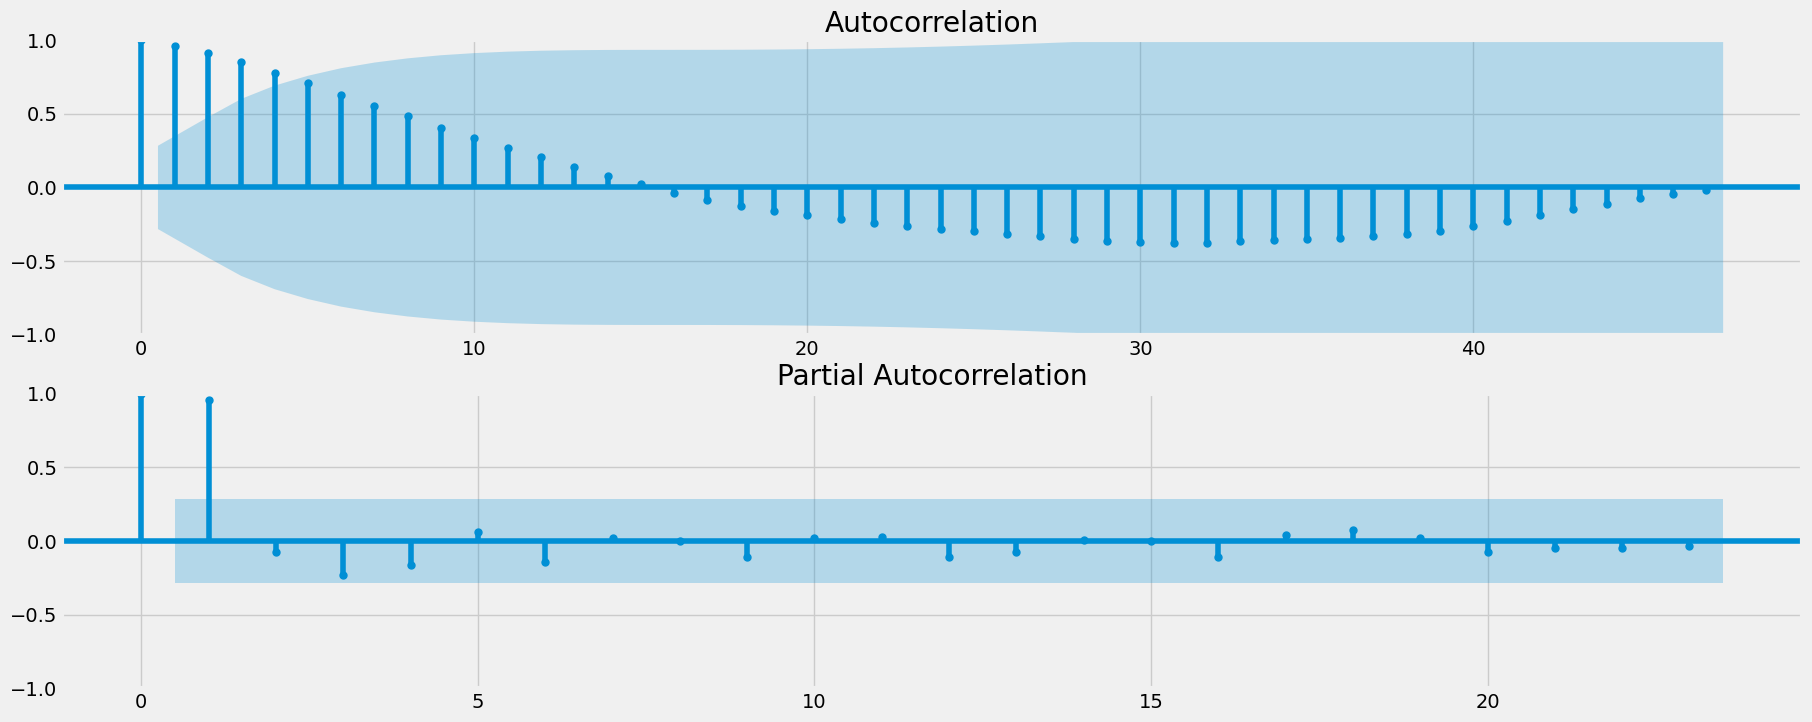

In [73]:
print(sm.tsa.stattools.acf(average, nlags=1, adjusted=True),"自相关系数")
print(sm.tsa.stattools.acf(average, nlags=10, adjusted=True),"自相关系数")
fig2 = plt.figure(figsize=(20,8))
ax2=fig2.add_subplot(211)
ax3=fig2.add_subplot(212)
plot_acf(average,lags=47,ax=ax2)
plot_pacf(average,lags=23,ax=ax3)
fig2.show()

## test_stationarity

序列平稳性检验方法选择：（单位根检验）  
1.可视化数据（作图主观判断）  
2.简单统计方法（将数据分为两段，对比两段数据的均值方差，判断是否存在明显差异）  
3.假设检验方法：3.1 DF检验 3.2 ***ADF检验*** 3.3 PP检验 3.4 DF-GLS检验 3.5 ***KPSS检验*** （建议询问CHAT-GPT选用哪种假设检验方式）（一天）over：选取ADF检验    
4.若检验发现数据不平稳，通过差分使数据平稳，使用的差分阶数即为需要的参数d（两天） df.diff() 确定差分阶数？ # 2023-11-24 暂时确定为二阶拆分 即参数d为2，但目前存在问题

### Hypothesis testing （ADF Augmented Dickey-Fuller Testing and KPSS）
ADF假设性检验流程([假设性检验参考](https://zhuanlan.zhihu.com/p/425664064 "各时序性检验"))  
原假设：若存在单位根，则时间序列是非平稳的  
备择假设（即拒绝原假设）：  
1.若不存在单位根，时间序列是平稳的  
2.在不存在单位根的大前提下又细分为四种结果：不含截距项且不含趋势项的平稳/含截距项但不含趋势项平稳/含截距项且含趋势平稳  
![ADF假设性检验流程](https://pic.edu.jg.com.cn/forum/201709/15/191747whiy0ihzgfiy0m8a.jpg)



45*6


### ADF Augmented Dickey-Fuller

[差分的概念以及diff()函数的参数理解](https://zhuanlan.zhihu.com/p/517283828)  
因此二阶差分应该为average.diff().diff()即一阶差分的差分或者diff(a=average,n=2)  average.diff(periods=2)是步长为2的一阶差分

In [62]:
diff_1=average.diff(1)
print("一阶拆分：\n")
print(diff_1)

diff_2=diff_1.diff()
print("二阶拆分：\n")
print(diff_2)

print("ADF(average)原数据的ADF检验结果：\n")
print(ADF(average))
print("ADF(diff_1.dropna()一阶拆分的的ADF检验结果：\n")
print(ADF(diff_1.dropna()))
print("ADF(diff2.dropna()二阶拆分的的ADF检验结果：\n")
print(ADF(diff_2.dropna()))

'''
（可用markdown单独书写一个模块用于结论推导）
结果表明原数据以及一阶拆分的单位根检验，P_value>0.05不能拒绝原假设（时间序列是非平稳的）的统计值如图，即原数据以及一阶拆分都是不平稳的
二阶拆分的P_value<0.05,即存在95%的可能性拒绝原假设（时间序列是非平稳的）即二阶拆分后的数据是平稳的
（二阶拆分的方式存疑，还需要验证）(已验证,见上一markdown模块)
'''

一阶拆分：

0              NaN
1      5530.925957
2      3427.575941
3     -1004.385401
4      1972.871590
5     -1045.655015
6      4654.238287
7      4042.972886
8     -1230.087346
9       154.918951
10     4699.336790
11    -8828.081451
12     3024.559799
13     5159.969815
14     6165.941250
15    -4577.921605
16     -424.003534
17     3411.914028
18     3054.633086
19    -5351.530571
20    -3926.621667
21      775.353179
22      359.114568
23     5083.542207
24     5327.142346
25     1412.182500
26     3451.634707
27     3752.723349
28     7269.762562
29     6949.702361
30    11498.802377
31    11101.493858
32    12197.675525
33    -3759.881698
34     1236.589383
35    -4413.777978
36     4209.817562
37    14957.825355
38     4080.539846
39    28075.273549
40   -11368.341806
41    12773.657130
42    -5426.891404
43   -10856.785278
44     3203.091497
45   -15841.340802
46   -10691.654059
47    -9680.363843
dtype: float64
二阶拆分：

0              NaN
1              NaN
2     -2103.350015
3 

'\n（可用markdown单独书写一个模块用于结论推导）\n结果表明原数据以及一阶拆分的单位根检验，P_value>0.05不能拒绝原假设（时间序列是非平稳的）的统计值如图，即原数据以及一阶拆分都是不平稳的\n二阶拆分的P_value<0.05,即存在95%的可能性拒绝原假设（时间序列是非平稳的）即二阶拆分后的数据是平稳的\n（二阶拆分的方式存疑，还需要验证）(已验证,见上一markdown模块)\n'

### data after second order difference

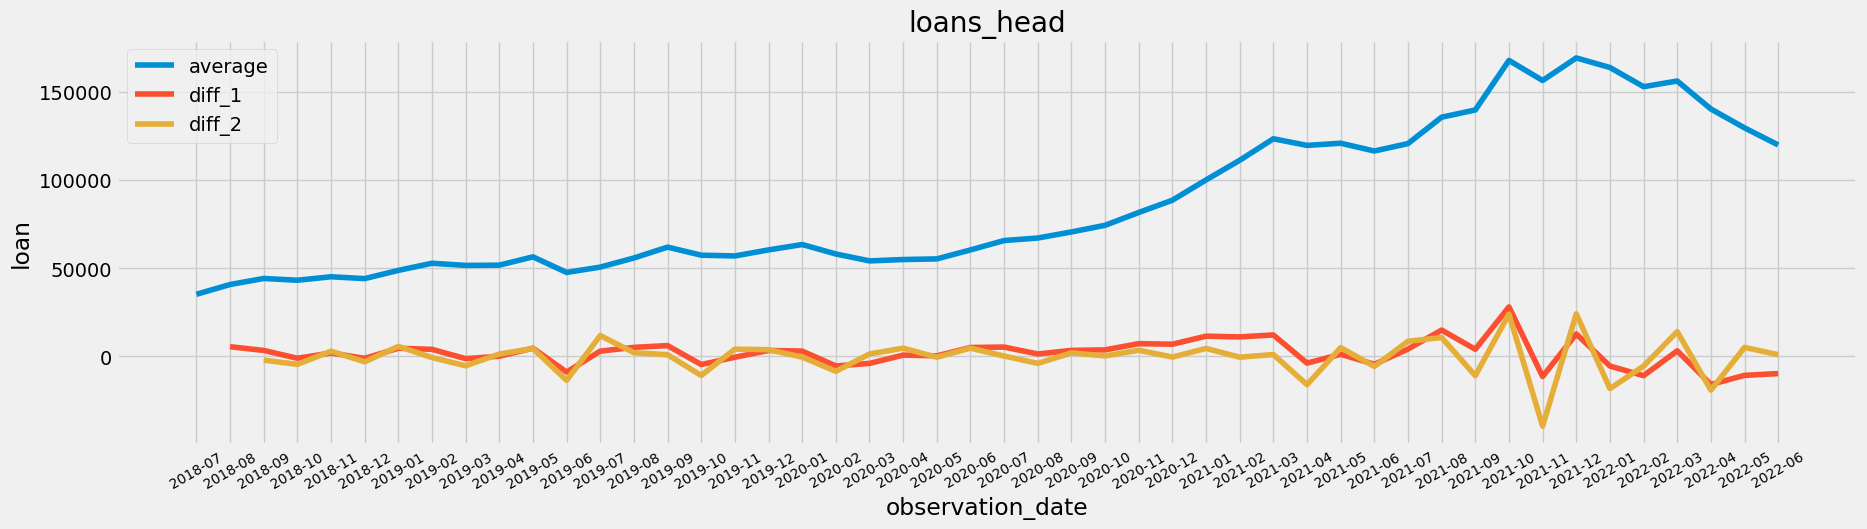

In [89]:
fig3 = plt.figure(figsize=(20,5))
ax=fig3.add_subplot(111)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='x', labelrotation= 30) 
ax.plot(date,average,label='average')#元数据
ax.plot(date,diff_1,label='diff_1')#一阶差分
ax.plot(date,diff_2,label='diff_2')#二阶差分
ax.set_xlabel('observation_date')
ax.set_ylabel('loan')
ax.set_title('loans_head')
ax.legend()

### KPSS  
to be continued

## GRID SERACH(GET DEGREE P and Q)
绘制原序列图（半天）over  
ACF图（半天）over  
PACF图（半天）over  
以判断历史数据走势及p、q阶数  
亦可采用网格搜索法自动确定阶数（p,q,P,Q）（两天）to be continued  
用图解法求解ARIMA模型的最优参数并非易事，主观性很大，而且耗费时间。所以本文进一步考虑利用网格搜索的方法系统地选择最优的参数值。

网格搜索可以遍历探索参数的不同组合。对于每个参数组合，可以利用Python中statsmodels模块的SARIMAX()函数拟合一个新的季节性ARIMA模型，并评估其整体质量。当网格搜索遍历完整个参数环境是，我们可以依据评价时间序列模型的准则从参数集中选出最佳性能的参数。

在评估和比较具有不同参数的统计模型时，可以根据数据的拟合程度或准确预测未来数据点的能力对每个模型进行排序。本文考虑使用AIC准则来评价选取模型。AIC准则是拟合精度和参数个数的加权函数，使AIC函数达到最小的模型被认为是最优模型。在Python中AIC值可以通过使用statsmodels拟合ARIMA模型返回。

# MODEL AND PROPHET
获取参数后可根据公式拟合曲线判断未来走势（一天？）
绘图

# TEST MODEL
残差 相关性（一天？）


# Model OPTIMIZATION
考虑是否必要？


参考：  
[SARIMA（P、D、Q)参数如何确定](https://zhuanlan.zhihu.com/p/531987920)(参数的选择,以及如何确定)  

[时间序列分析—从ARMA到ARIMA再到SARIMA](https://segmentfault.com/a/1190000041003428#item-4-2)(网格搜索、模型搭建)

[使用SARIMA做季节时间序列预测全**流程**](https://zhuanlan.zhihu.com/p/117595003)(聚焦流程)

[时间序列的平稳性检验](https://zhuanlan.zhihu.com/p/425664064 "各时序性检验")(检验方法的选择)  



**最有用的** **必看**[***SARIMA模型分析案例***](https://zhuanlan.zhihu.com/p/127032260)(SARIMA流程全解,残差检验,模型建立)  
通过Python中的seasonal_decompose函数可以提取序列的趋势、季节和随机效应。对于非平稳的时间序列，可以通过对趋势和季节性进行建模并将它们从模型中剔除，从而将非平稳的数据转换为平稳数据，并对其残差进行进一步的分析。